In [17]:
import psycopg2
from psycopg2.extensions import connection

In [18]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [19]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [20]:
table = "social_network"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [21]:
# Create a dataframe

import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,compose_post_service_cpu,compose_post_service_memory,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_service_cpu,home_timeline_service_memory,jaeger_cpu,jaeger_memory,media_frontend_cpu,...,user_mongodb_memory,user_service_cpu,user_service_memory,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_service_cpu,user_timeline_service_memory,timestamp
0,1,0.005998,8.445312,2.059615,1131.542969,0.004099,8.007812,0.427908,49.753906,0.045335,...,118.980469,0.043885,13.191406,3.932542,776.929688,5.191073,172.976562,0.051933,65.496094,1715605625
1,2,0.002898,8.445312,2.760679,1131.292969,0.005846,8.007812,0.427737,49.753906,0.045317,...,118.980469,0.052911,13.191406,3.930973,776.929688,2.317454,172.976562,0.031177,65.496094,1715605635
2,3,0.006995,8.445312,2.760892,1131.292969,0.001749,8.007812,0.290060,49.753906,0.059611,...,118.980469,0.029980,13.191406,4.839881,776.929688,3.156883,172.726562,0.022785,65.496094,1715605645
3,4,0.004098,8.445312,1.445381,1131.292969,0.003648,8.007812,1.147550,49.753906,0.131076,...,118.980469,0.021788,13.191406,7.814124,776.929688,3.157162,172.726562,0.057617,65.496094,1715605655
4,5,0.004147,8.445312,4.111468,1131.292969,0.005596,8.007812,0.857380,49.753906,0.071453,...,118.980469,0.021786,13.191406,5.912821,776.929688,3.366363,172.726562,0.034827,65.496094,1715605665


In [22]:
table = "social_network_predicted"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [23]:
# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,compose_post_service_cpu,compose_post_service_memory,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_service_cpu,home_timeline_service_memory,jaeger_cpu,jaeger_memory,media_frontend_cpu,...,user_mongodb_memory,user_service_cpu,user_service_memory,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_service_cpu,user_timeline_service_memory,timestamp
0,1,20.579956,12.188773,548.84534,1568.6947,33.276320,8.865849,130.74869,1366.7836,0.216831,...,119.28935,0.0,13.583260,0.0,381.44168,15.062336,73.468070,32.139343,20.625908,1715605925
1,2,20.138056,12.172542,547.74310,1566.6317,33.123333,8.855640,130.82413,1365.9105,0.216702,...,119.28948,0.0,13.583036,0.0,381.36734,15.007441,73.422195,31.900948,20.604584,1715605935
2,3,19.195450,12.157532,547.84350,1568.3378,33.119260,8.843505,131.27534,1365.6682,0.217211,...,119.29023,0.0,13.581907,0.0,381.32520,15.047771,73.412700,31.797043,20.583440,1715605945
3,4,20.214094,12.179462,551.82300,1573.7716,33.458810,8.837698,131.07915,1365.1985,0.217952,...,119.29079,0.0,13.581601,0.0,381.34085,15.147406,73.443565,31.925620,20.570185,1715605955
4,5,20.136002,12.160220,546.26294,1569.4161,33.063766,8.843176,131.18564,1366.2992,0.216844,...,119.28998,0.0,13.581232,0.0,381.39032,15.034082,73.444360,32.082375,20.590584,1715605965


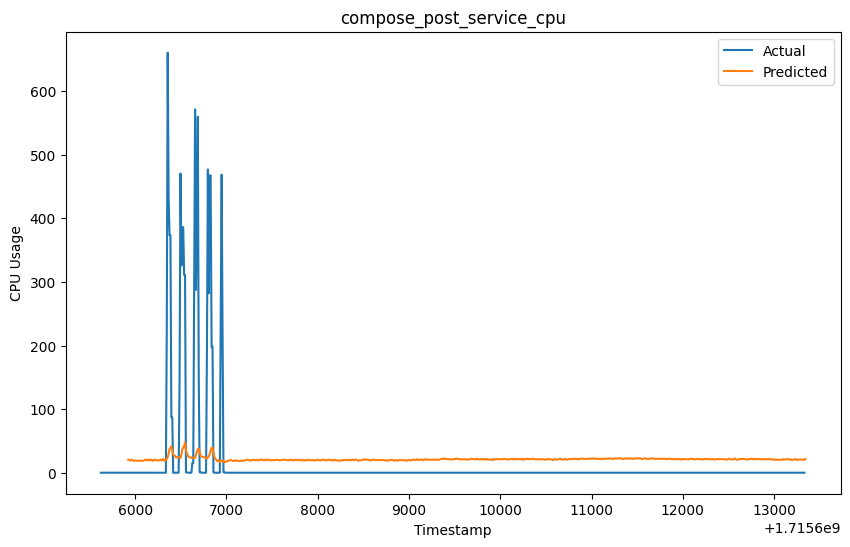

In [32]:
# Plot the data using line plot
import matplotlib.pyplot as plt
metric = 'compose_post_service_cpu'
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df[metric], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
plt.title(metric)
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

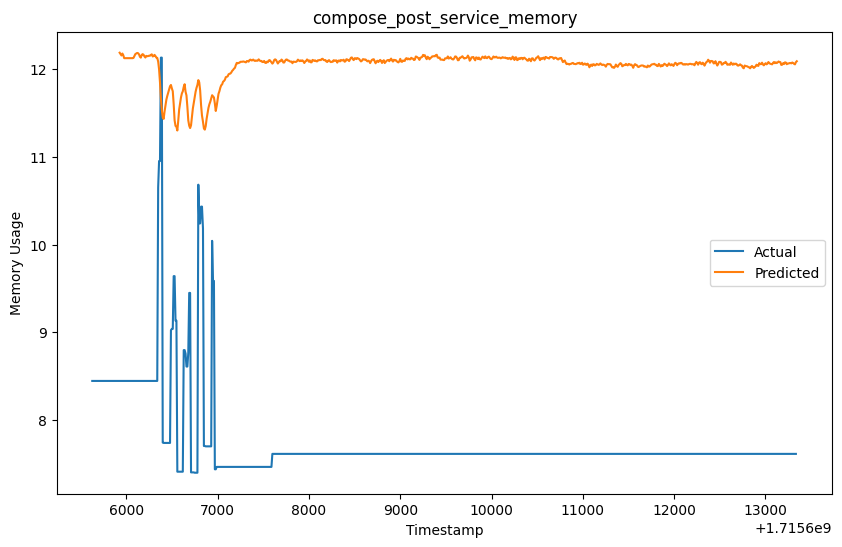

In [34]:
# Plot the data using line plot
import matplotlib.pyplot as plt

metric = 'compose_post_service_memory'
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df[metric], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
plt.title(metric)
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage')
plt.legend()
plt.show()

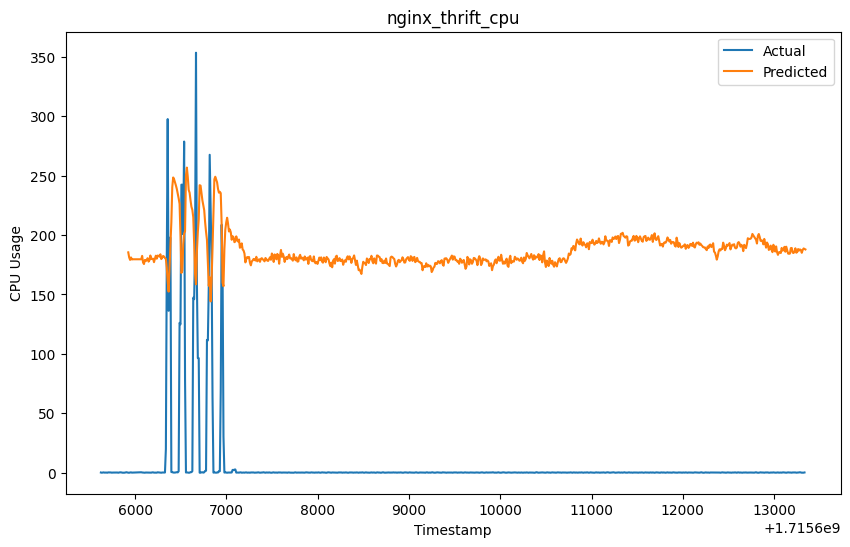

In [35]:
# Plot the data using line plot
import matplotlib.pyplot as plt

metric = 'nginx_thrift_cpu'
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df[metric], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
plt.title(metric)
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

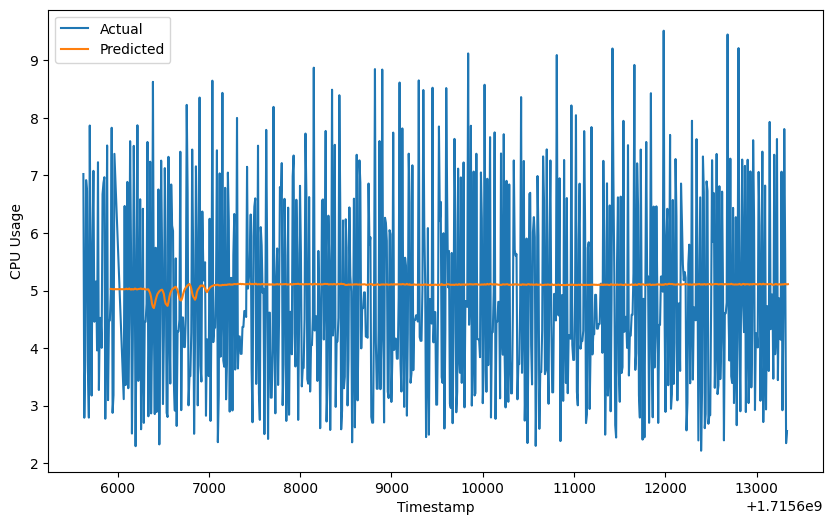

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['user_mongodb_cpu'], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted['user_mongodb_cpu'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

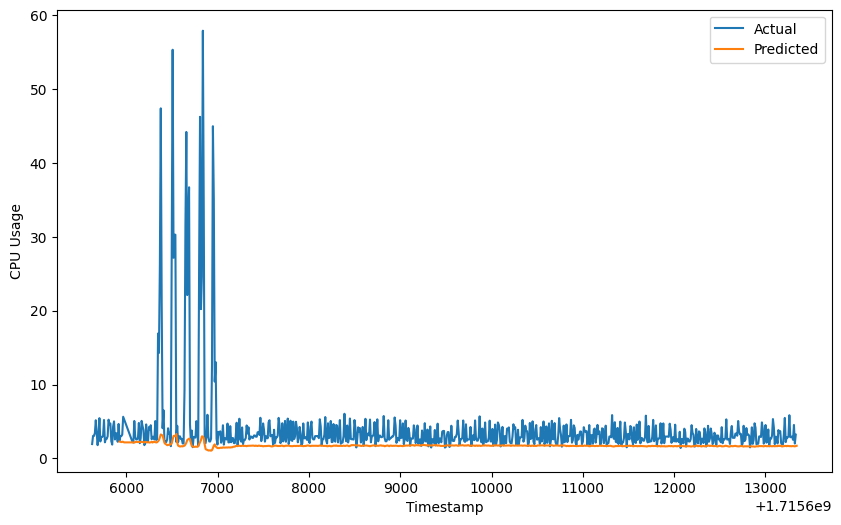

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['social_graph_redis_cpu'], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted['social_graph_redis_cpu'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

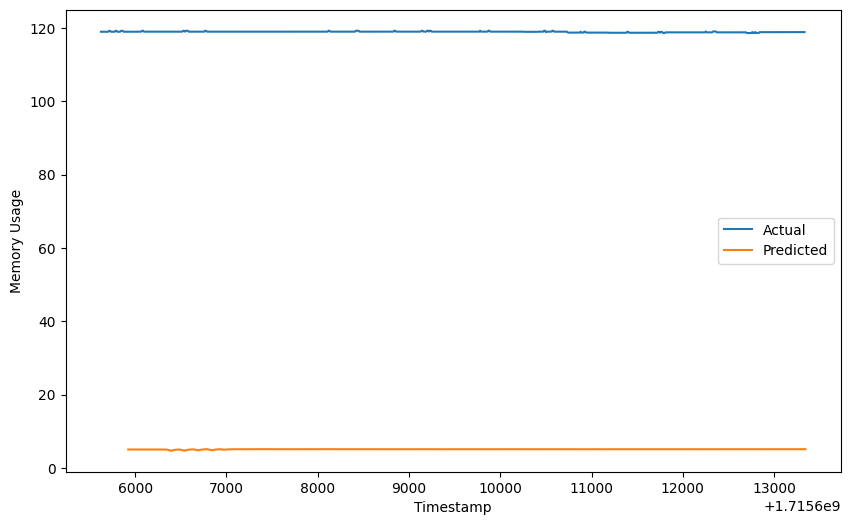

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['user_mongodb_memory'], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted['user_mongodb_cpu'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage')
plt.legend()
plt.show()

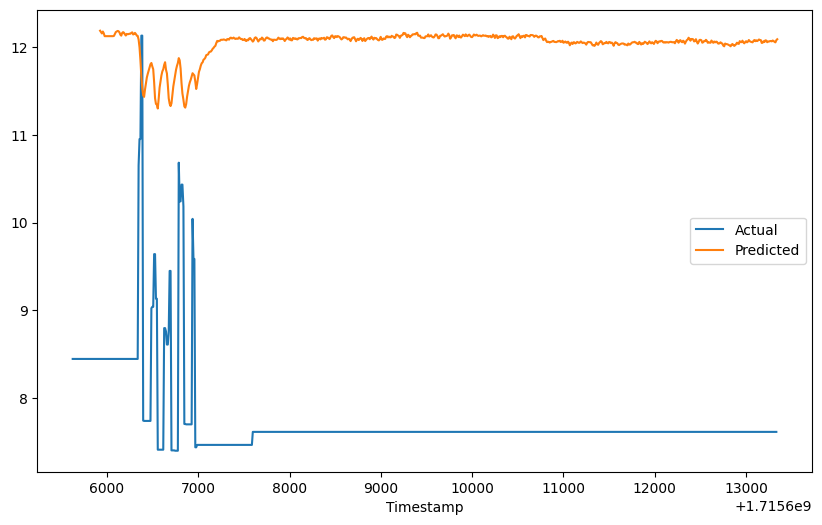

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['compose_post_service_memory'], label='Actual')
plt.plot(df_predicted['timestamp'], df_predicted['compose_post_service_memory'], label='Predicted')
plt.xlabel('Timestamp')
plt.legend()
plt.show()


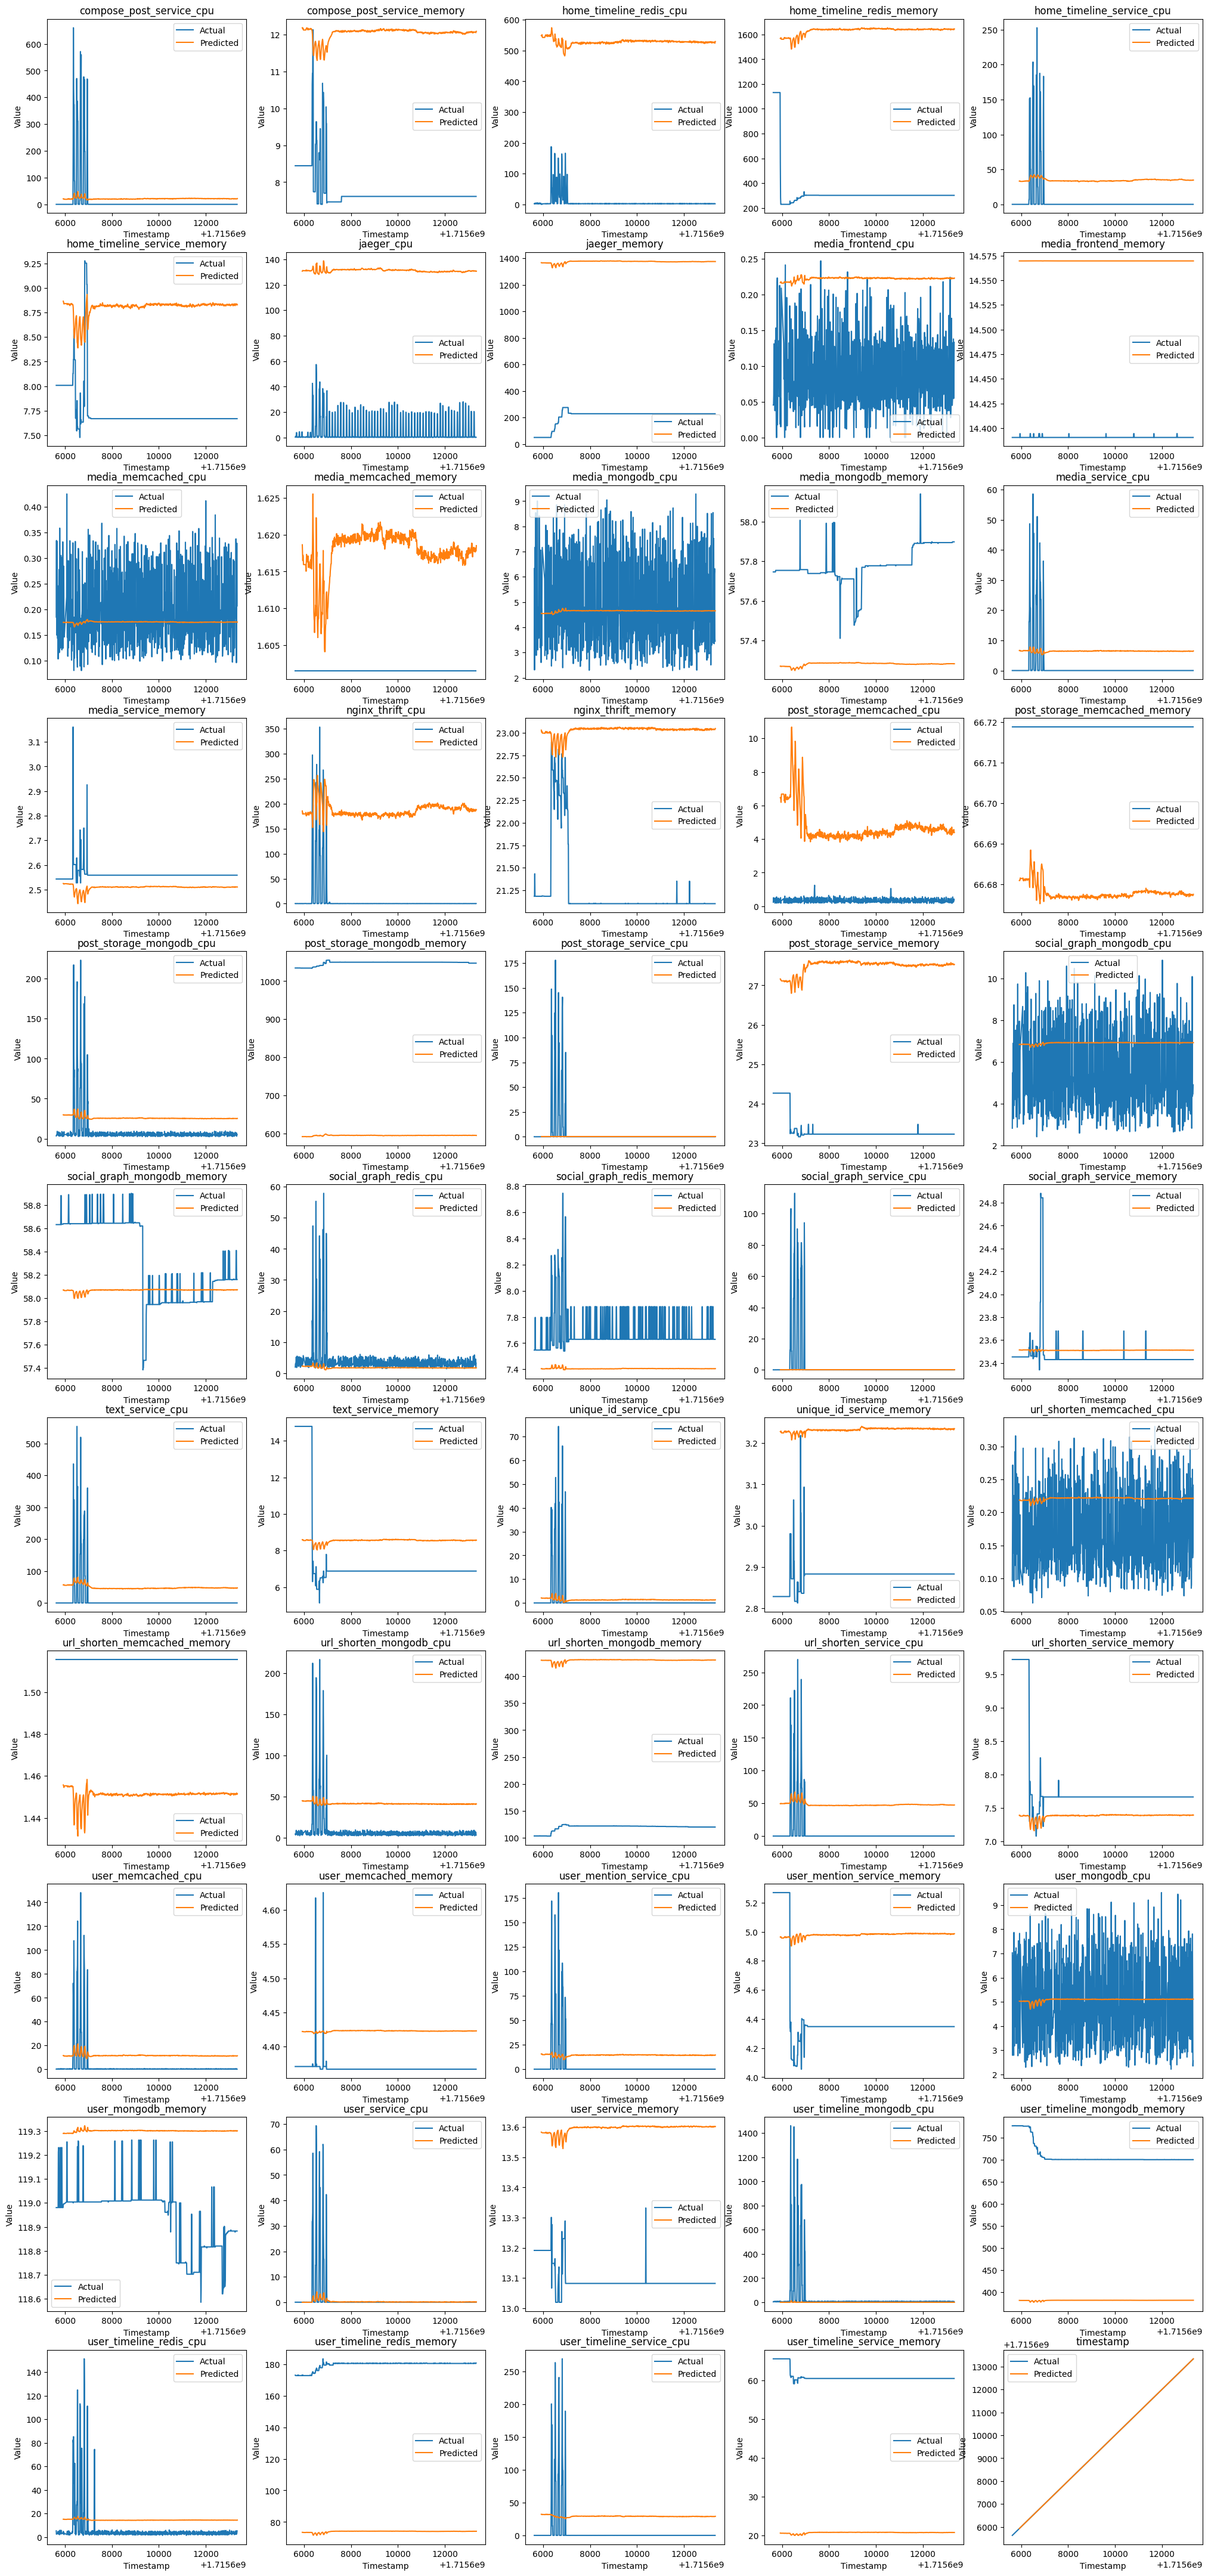

In [41]:
# Plot the data using line plot
import matplotlib.pyplot as plt
# Create 5x5 grid of subplots
fig, axes = plt.subplots(11, 5, figsize=(25, 55))
# Flatten the axes array
axes = axes.flatten()
# Plot each metric
for i, metric in enumerate(df.columns[1:]):
    axes[i].plot(df['timestamp'], df[metric], label='Actual')
    axes[i].plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')
    axes[i].legend()

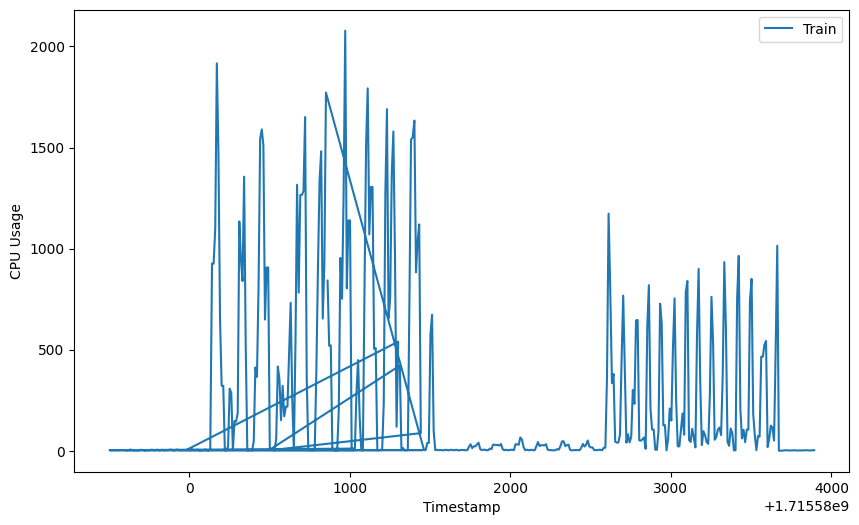

In [30]:
table = "social_network_6"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()
df_train = pd.DataFrame(raw_predicted_data, columns=column_names)
df_train = df_train.clip(lower=0)
plt.figure(figsize=(10, 6))
plt.plot(df_train['timestamp'], df_train['home_timeline_redis_cpu'], label='Train')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()